# **Data Mining Final Project**
# PART 5:  Credit Card Fraud Detection: Model training- Neural network model

# **Introduction:**
# This notebook is dedicated to advanced data analysis for credit card fraud detection.
## The main steps include:
##1. Random forest model training (Part 4 colab)
##2. Neural network model training
##3. Model performance comparison

# Step 1: Import necessary libraries


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Display TensorFlow version
print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.18.0


# Step 2: Upload and Load SMOTE-processed Data and preporcessed test data


In [ ]:
# Enable file upload in Google Colab
from google.colab import files
print("Please upload your SMOTE-processed training data (smote_processed_data.csv)")
uploaded_train = files.upload()

print("\nPlease upload your preprocessed test data (test_preprocessed.csv)")
uploaded_test = files.upload()

Please upload your SMOTE-processed training data (smote_processed_data.csv)


Saving smote_processed_data.csv to smote_processed_data (1).csv

Please upload your preprocessed test data (test_preprocessed.csv)


Saving test_preprocessed.csv to test_preprocessed.csv


# Load Data

In [ ]:
# 1. Load SMOTE-processed training data
train_smote = pd.read_csv('smote_processed_data.csv')
# 2. Load preprocessed test data (without SMOTE)
test_data = pd.read_csv('test_preprocessed.csv')

print("Dataset Information:")
print(f"SMOTE-processed training set shape: {train_smote.shape}")
print(f"Test set shape: {test_data.shape}")

Dataset Information:
SMOTE-processed training set shape: (363922, 30)
Test set shape: (56962, 30)


# Define features (X) and target (y)


In [ ]:
X_train = train_smote.drop(columns=['Class'])
y_train = train_smote['Class']

X_test = test_data.drop(columns=['Class'])
y_test = test_data['Class']


# Ensure training and test sets have the same columns


In [ ]:
common_columns = X_train.columns.intersection(X_test.columns)
X_train = X_train[common_columns]
X_test = X_test[common_columns]

# Convert to numpy arrays


In [ ]:
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

# Define model architecture (based on Kaggle example)


In [ ]:
print("\nBuilding Neural Network model...")
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(1, activation='sigmoid')
])


Building Neural Network model...


# Compile the model with class weights to handle remaining imbalance


In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)


# Add early stopping to prevent overfitting


In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [ ]:
# Print model summary
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 64)                  │           1,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,993 (19.50 KB)

 Trainable params: 4,769 (18.63 KB)

 Non-trainable params: 224 (896.00 B)

# Train the model


In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=256,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/30
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.9985 - auc_1: 0.9997 - loss: 0.0071 - precision_1: 0.9969 - recall_1: 0.9990 - val_accuracy: 1.0000 - val_auc_1: 0.0000e+00 - val_loss: 6.0652e-04 - val_precision_1: 1.0000 - val_recall_1: 1.0000
Epoch 2/30
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9984 - auc_1: 0.9996 - loss: 0.0076 - precision_1: 0.9965 - recall_1: 0.9991 - val_accuracy: 1.0000 - val_auc_1: 0.0000e+00 - val_loss: 6.4763e-04 - val_precision_1: 1.0000 - val_recall_1: 1.0000
Epoch 3/30
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9982 - auc_1: 0.9996 - loss: 0.0083 - precision_1: 0.9962 - recall_1: 0.9990 - val_accuracy: 1.0000 - val_auc_1: 0.0000e+00 - val_loss: 5.0220e-04 - val_precision_1: 1.0000 - val_recall_1: 1.0000
Epoch 4/30
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9982 - auc_1: 0.9996 - loss: 0.0080 - precision_1: 0.9962 - recall_1: 0.9989 - val_accuracy: 1.0000 - val_auc_1: 0.0000e+00 - val_loss:

# Plot Training History


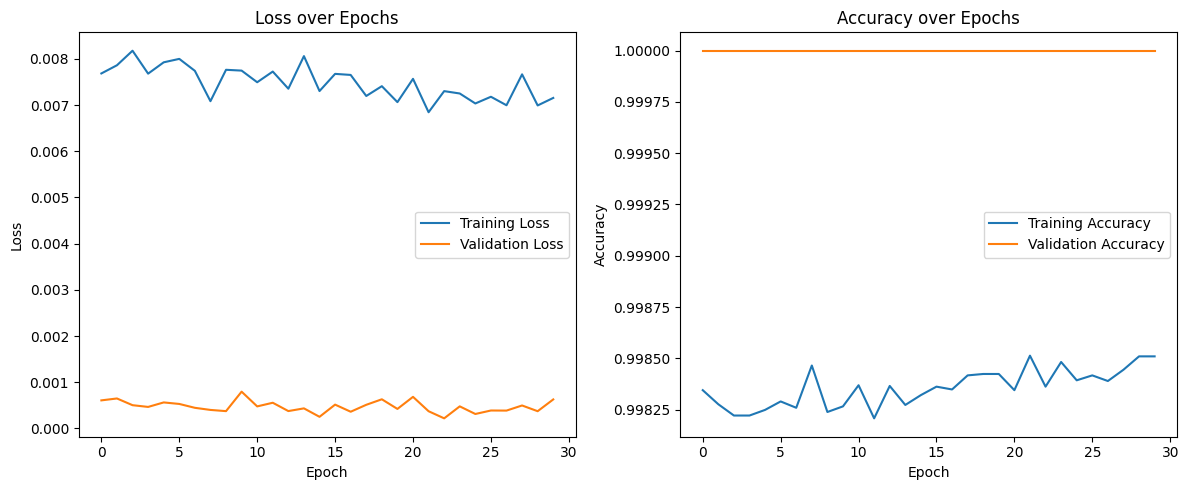

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.savefig('training_history.png')
plt.show()


# Evaluate on test set


In [ ]:
print("\n--- Neural Network Model Evaluation ---")
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba >= 0.5).astype(int)




--- Neural Network Model Evaluation ---
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


# Display results


In [ ]:
# Display results
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.65      0.82      0.72        98

    accuracy                           1.00     56962
   macro avg       0.82      0.91      0.86     56962
weighted avg       1.00      1.00      1.00     56962



# Plot confusion matrix


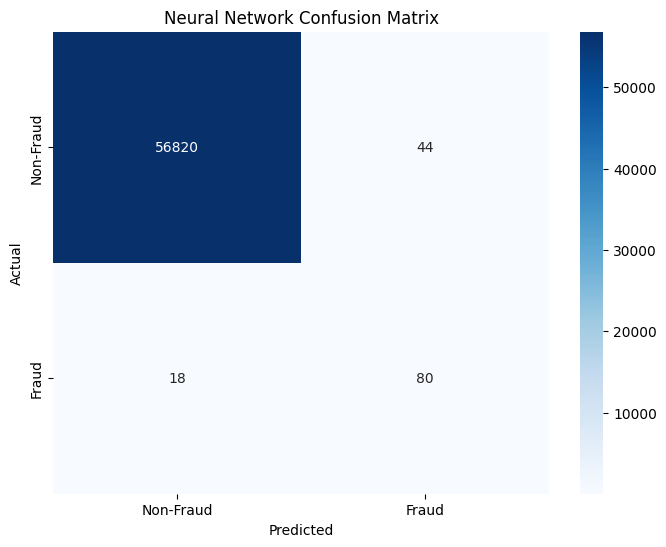

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Neural Network Confusion Matrix')
plt.show()

# ROC curve


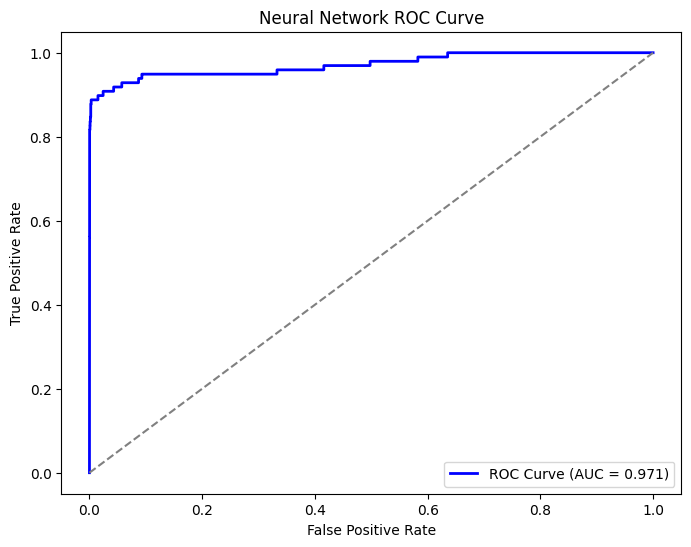

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Neural Network ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve


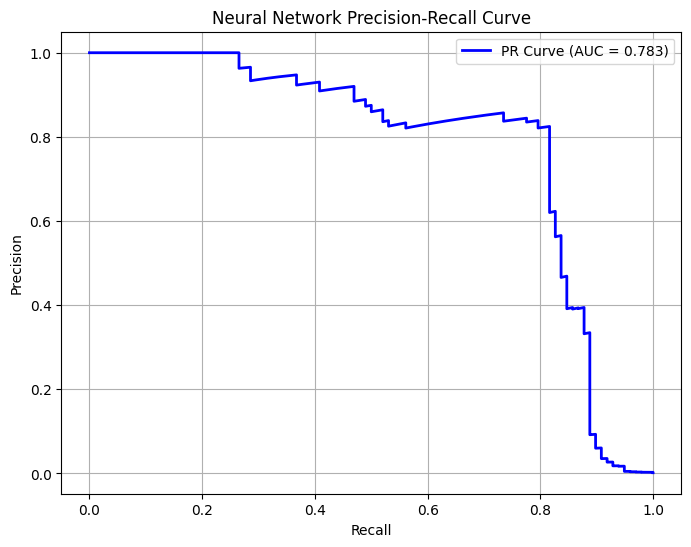

In [58]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR Curve (AUC = {pr_auc:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Neural Network Precision-Recall Curve')
plt.legend(loc="upper right")
plt.grid(True)
plt.show()




# Perform threshold optimization (similar to your Random Foreset approach)


In [60]:
# Threshold optimization
print("\n--- Test Data Analysis ---")
print(f"Number of fraud cases in test set: {np.sum(y_test)}")
print(f"Percentage of fraud cases in test set: {np.mean(y_test)*100:.2f}%")

print("\n--- Prediction Probabilities Analysis ---")
print(f"Min prediction probability: {np.min(y_pred_proba):.4f}")
print(f"Max prediction probability: {np.max(y_pred_proba):.4f}")
print(f"Mean prediction probability: {np.mean(y_pred_proba):.4f}")
print(f"Median prediction probability: {np.median(y_pred_proba):.4f}")



--- Test Data Analysis ---
Number of fraud cases in test set: 98
Percentage of fraud cases in test set: 0.17%

--- Prediction Probabilities Analysis ---
Min prediction probability: 0.0000
Max prediction probability: 1.0000
Mean prediction probability: 0.0022
Median prediction probability: 0.0000


# Plot the distribution of prediction probabilities


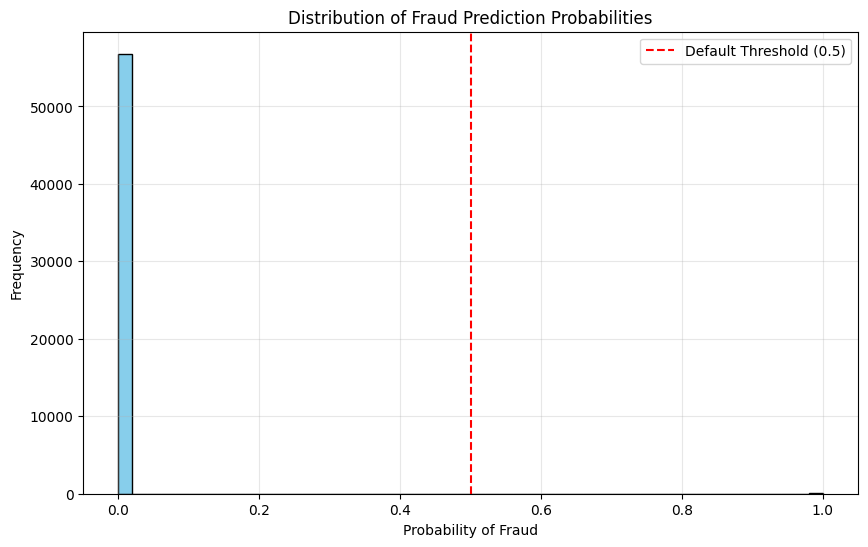

In [61]:
plt.figure(figsize=(10, 6))
plt.hist(y_pred_proba, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Fraud Prediction Probabilities')
plt.xlabel('Probability of Fraud')
plt.ylabel('Frequency')
plt.axvline(x=0.5, color='red', linestyle='--', label='Default Threshold (0.5)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Separate probabilities by actual class for better analysis


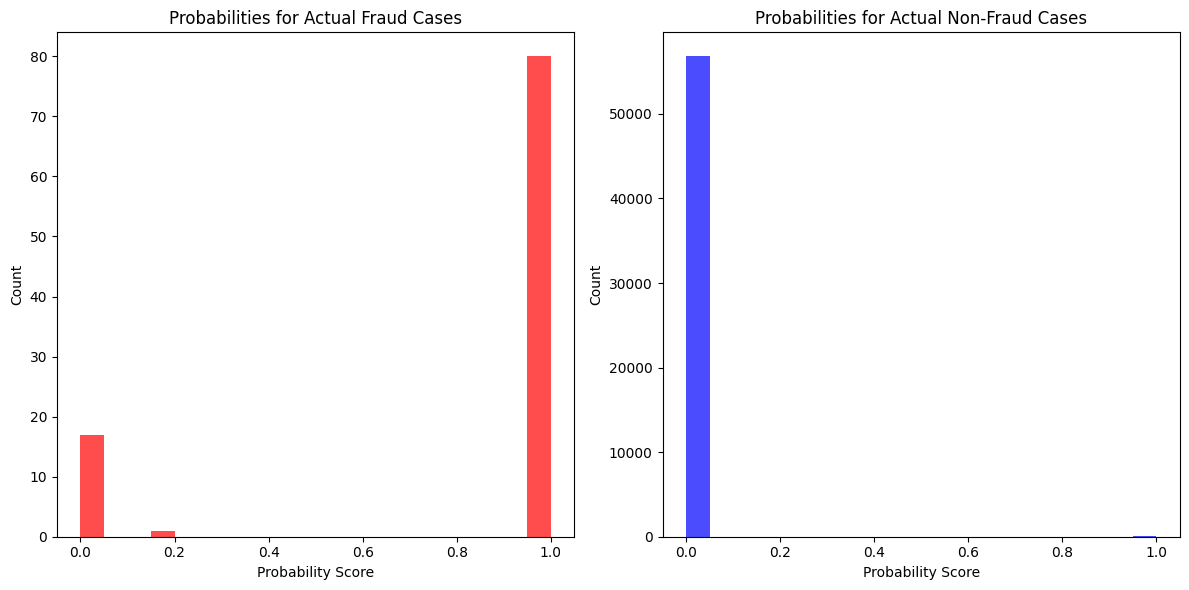

Mean probability for actual fraud cases: 0.8184
Mean probability for actual non-fraud cases: 0.0008


In [62]:
fraud_probs = y_pred_proba[y_test == 1]
non_fraud_probs = y_pred_proba[y_test == 0]

if len(fraud_probs) > 0 and len(non_fraud_probs) > 0:
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.hist(fraud_probs, bins=20, color='red', alpha=0.7)
    plt.title('Probabilities for Actual Fraud Cases')
    plt.xlabel('Probability Score')
    plt.ylabel('Count')

    plt.subplot(1, 2, 2)
    plt.hist(non_fraud_probs, bins=20, color='blue', alpha=0.7)
    plt.title('Probabilities for Actual Non-Fraud Cases')
    plt.xlabel('Probability Score')
    plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

    print(f"Mean probability for actual fraud cases: {np.mean(fraud_probs):.4f}")
    print(f"Mean probability for actual non-fraud cases: {np.mean(non_fraud_probs):.4f}")
else:
    print("Cannot create separate histograms - not enough samples in one or both classes")

# Calculate and display the default model performance (threshold=0.5)


In [63]:
default_preds = (y_pred_proba >= 0.5).astype(int)
print("\n--- Default Threshold (0.5) Performance ---")
print(classification_report(y_test, default_preds))


--- Default Threshold (0.5) Performance ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.65      0.82      0.72        98

    accuracy                           1.00     56962
   macro avg       0.82      0.91      0.86     56962
weighted avg       1.00      1.00      1.00     56962



# Display confusion matrix for default threshold



--- Finding Optimal Threshold ---


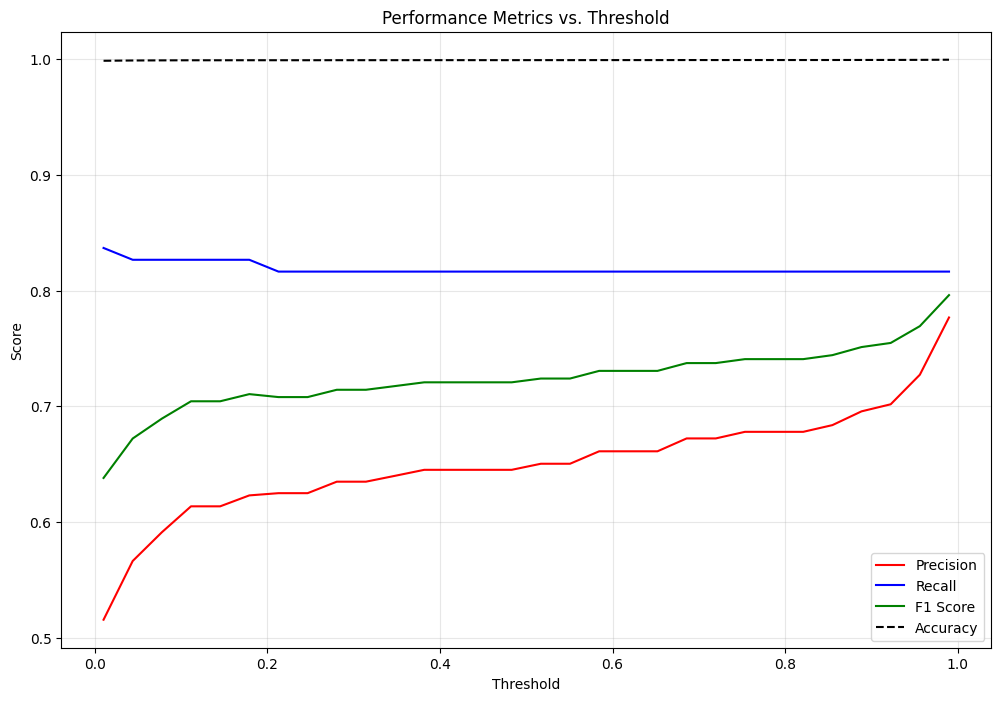

Optimal threshold for F1 Score: 0.9900 (F1 = 0.7960)

--- Performance at Optimal F1 Threshold ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.78      0.82      0.80        98

    accuracy                           1.00     56962
   macro avg       0.89      0.91      0.90     56962
weighted avg       1.00      1.00      1.00     56962



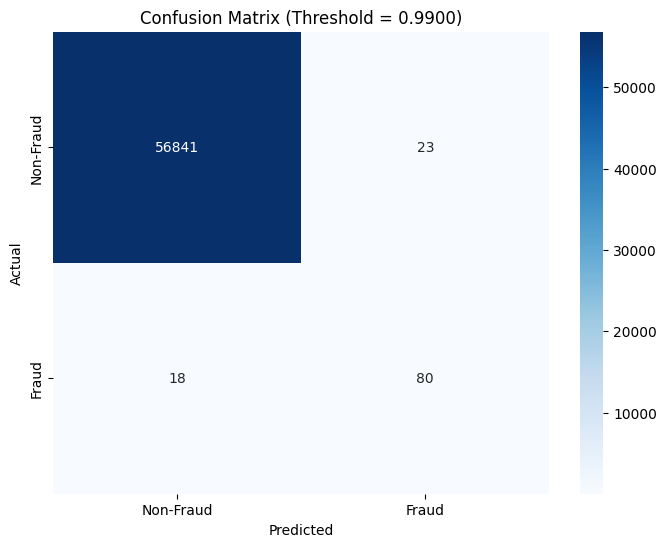


F1 Score at default threshold (0.5): 0.7207
F1 Score at optimal threshold (0.9900): 0.7960
Improvement: 10.45%


In [65]:
# Robust threshold optimization using various metrics
print("\n--- Finding Optimal Threshold ---")
# Define a range of thresholds to test
thresholds = np.linspace(0.01, 0.99, 30)

# Initialize lists to store metrics
results = []

# Calculate metrics at each threshold
for threshold in thresholds:
    y_pred_at_threshold = (y_pred_proba >= threshold).astype(int)

    # In case of no positive predictions or divide-by-zero
    try:
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred_at_threshold).ravel()

        # Guard against division by zero
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        # Calculate accuracy
        accuracy = (tp + tn) / (tp + tn + fp + fn)

        # Store all metrics
        results.append({
            'threshold': threshold,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'accuracy': accuracy,
            'tp': tp,
            'fp': fp,
            'tn': tn,
            'fn': fn
        })
    except Exception as e:
        print(f"Error at threshold {threshold:.2f}: {e}")

# Convert results to DataFrame for easier analysis
if results:
    results_df = pd.DataFrame(results)

    # Plot the metrics vs threshold
    plt.figure(figsize=(12, 8))

    plt.plot(results_df['threshold'], results_df['precision'], 'r-', label='Precision')
    plt.plot(results_df['threshold'], results_df['recall'], 'b-', label='Recall')
    plt.plot(results_df['threshold'], results_df['f1'], 'g-', label='F1 Score')
    plt.plot(results_df['threshold'], results_df['accuracy'], 'k--', label='Accuracy')

    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.title('Performance Metrics vs. Threshold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    # Find optimal thresholds for different metrics
    best_f1_idx = results_df['f1'].idxmax()
    best_f1_threshold = results_df.loc[best_f1_idx, 'threshold']
    best_f1_score = results_df.loc[best_f1_idx, 'f1']

    print(f"Optimal threshold for F1 Score: {best_f1_threshold:.4f} (F1 = {best_f1_score:.4f})")

    # Check if F1 score is valid
    if best_f1_score > 0:
        # Get performance metrics at the optimal F1 threshold
        optimal_predictions = (y_pred_proba >= best_f1_threshold).astype(int)

        print("\n--- Performance at Optimal F1 Threshold ---")
        print(classification_report(y_test, optimal_predictions))

        # Plot confusion matrix at optimal threshold
        plt.figure(figsize=(8, 6))
        optimal_cm = confusion_matrix(y_test, optimal_predictions)
        sns.heatmap(optimal_cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Non-Fraud', 'Fraud'],
                    yticklabels=['Non-Fraud', 'Fraud'])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix (Threshold = {best_f1_threshold:.4f})')
        plt.show()

        # Calculate default F1 score manually instead of using f1_score function
        tn_default, fp_default, fn_default, tp_default = confusion_matrix(y_test, default_preds).ravel()
        default_precision = tp_default / (tp_default + fp_default) if (tp_default + fp_default) > 0 else 0
        default_recall = tp_default / (tp_default + fn_default) if (tp_default + fn_default) > 0 else 0
        default_f1 = 2 * (default_precision * default_recall) / (default_precision + default_recall) if (default_precision + default_recall) > 0 else 0

        # Compare with optimal threshold
        improvement = (best_f1_score - default_f1) / default_f1 * 100 if default_f1 > 0 else float('inf')

        print(f"\nF1 Score at default threshold (0.5): {default_f1:.4f}")
        print(f"F1 Score at optimal threshold ({best_f1_threshold:.4f}): {best_f1_score:.4f}")
        print(f"Improvement: {improvement:.2f}%")
    else:
        print("Could not find valid F1 scores. Using default threshold (0.5).")
        print("This often happens with highly imbalanced test sets or when the model doesn't discriminate well.")
else:
    print("Could not calculate metrics across thresholds. Check for data issues or model problems.")
